In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv('C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Alcohal_Sales.csv', index_col=0, parse_dates=True)

In [55]:
df.index.freq = 'MS'

In [56]:
df.head()

,Sales
Date,
1992-01-01,4302
1992-02-01,4323
1992-03-01,4199
1992-04-01,4397
1992-05-01,4159


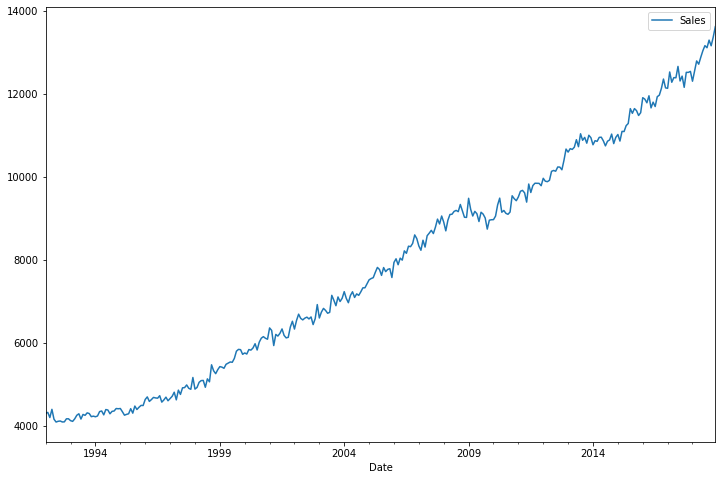

In [57]:
df.plot(figsize=(12,8))

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

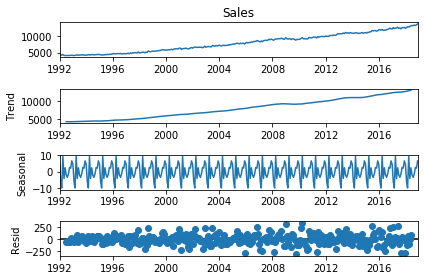

In [59]:
seasonal_decompose(df['Sales']).plot();

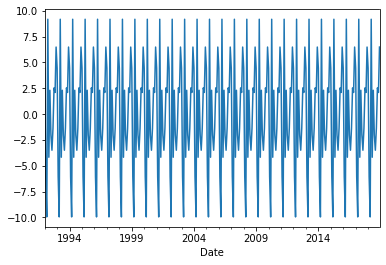

In [60]:
seasonal_decompose(df['Sales']).seasonal.plot();

In [61]:
len(df)

324

In [62]:
df.tail()

,Sales
Date,
2018-08-01,13116
2018-09-01,13300
2018-10-01,13164
2018-11-01,13372
2018-12-01,13624


In [63]:
df.head()

,Sales
Date,
1992-01-01,4302
1992-02-01,4323
1992-03-01,4199
1992-04-01,4397
1992-05-01,4159


In [64]:
df.dropna().shape

(324, 1)

### Train test split:

In [65]:
train = df[:-12]
test = df[-12:]

In [66]:
train.tail()

,Sales
Date,
2017-08-01,12432
2017-09-01,12162
2017-10-01,12523
2017-11-01,12522
2017-12-01,12546


In [67]:
test.head()

,Sales
Date,
2018-01-01,12309
2018-02-01,12548
2018-03-01,12798
2018-04-01,12720
2018-05-01,12888


When you are running a neural net, we need to normalize or scale the data, since with NN we are calc bias and weights, and if the data is too skewed off or the max and min values have huge difference then NN may get confused to identify what value of weights and biases to use, thus scale of 0 to 1 is preferred.!

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)

In [69]:
scaled_test = scaler.transform(test)

##### We are ready to use this on Time Series Generator object:

In [70]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [71]:
scaled_train

array([[2.46064140e-02],
       [2.70553936e-02],
       [1.25947522e-02],
       [3.56851312e-02],
       [7.93002915e-03],
       [0.00000000e+00],
       [2.09912536e-03],
       [2.91545190e-03],
       [2.33236152e-04],
       [4.66472303e-04],
       [9.09620991e-03],
       [9.09620991e-03],
       [3.84839650e-03],
       [1.86588921e-03],
       [8.97959184e-03],
       [1.90087464e-02],
       [2.32069971e-02],
       [8.39650146e-03],
       [2.13411079e-02],
       [1.88921283e-02],
       [2.57725948e-02],
       [2.39067055e-02],
       [1.51603499e-02],
       [1.65597668e-02],
       [1.48104956e-02],
       [1.70262391e-02],
       [2.93877551e-02],
       [3.10204082e-02],
       [2.01749271e-02],
       [3.51020408e-02],
       [3.38192420e-02],
       [2.32069971e-02],
       [2.99708455e-02],
       [3.10204082e-02],
       [3.80174927e-02],
       [3.73177843e-02],
       [3.80174927e-02],
       [2.89212828e-02],
       [1.92419825e-02],
       [2.15743440e-02],


In [72]:
scaled_test

array([[0.95836735],
       [0.98623907],
       [1.01539359],
       [1.00629738],
       [1.02588921],
       [1.04408163],
       [1.05842566],
       [1.05247813],
       [1.07393586],
       [1.0580758 ],
       [1.08233236],
       [1.11172012]])

In [73]:
n_input = 2
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length= n_input, batch_size=1)

In [74]:
len(scaled_train)

312

In [75]:
len(generator) ## i.e. len(scaled_train) - No. of inputs in generator at a time!

310

In [76]:
generator[0]

(array([[[0.02460641],
         [0.02705539]]]), array([[0.01259475]]))

In [77]:
X,y= generator[0]

In [78]:
X

array([[[0.02460641],
        [0.02705539]]])

In [79]:
y

array([[0.01259475]])

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [81]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length= n_input, batch_size=1)

In [82]:
model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))

In [83]:
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit_generator(train_generator, epochs = 25)

Epoch 1/25
300/300 [==============================] - 2s 6ms/step - loss: 0.0147
Epoch 2/25
300/300 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 3/25
300/300 [==============================] - 2s 7ms/step - loss: 0.0012
Epoch 4/25
300/300 [==============================] - 2s 5ms/step - loss: 6.6812e-04
Epoch 5/25
300/300 [==============================] - 2s 7ms/step - loss: 9.0428e-04
Epoch 6/25
300/300 [==============================] - 2s 7ms/step - loss: 7.9221e-04
Epoch 7/25
300/300 [==============================] - 2s 7ms/step - loss: 6.5634e-04
Epoch 8/25
300/300 [==============================] - 2s 7ms/step - loss: 8.0997e-04
Epoch 9/25
300/300 [==============================] - 2s 7ms/step - loss: 5.7512e-04
Epoch 10/25
300/300 [==============================] - 2s 6ms/step - loss: 7.6592e-04
Epoch 11/25
300/300 [==============================] - 2s 6ms/step - loss: 7.3019e-04
Epoch 12/25
300/300 [==============================] - 2s 5ms/step - loss: 

In [86]:
model.history.history.keys()

dict_keys(['loss'])

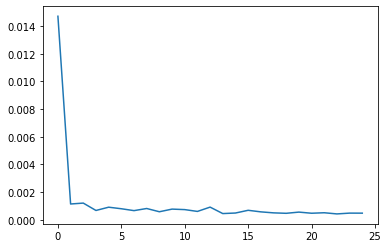

In [87]:
myloss= model.history.history['loss']
plt.plot(range(len(myloss)), myloss)

In [88]:
# We know, our model is trained such that:
# 12 history steps -----> step 13
# last 12 points train -----> point 1 of the test data!

In [89]:
first_eval_batch = scaled_train[-12:]

In [90]:
first_eval_batch

array([[0.93842566],
       [0.98437318],
       [0.9554519 ],
       [0.96851312],
       [0.96804665],
       [1.        ],
       [0.95906706],
       [0.97271137],
       [0.94122449],
       [0.98332362],
       [0.983207  ],
       [0.98600583]])

In [91]:
# need to reshape the first evaluation batch:

first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [92]:
model.predict(first_eval_batch) # forecasted 1st point of test data

array([[1.0021701]], dtype=float32)

### Forecast using RNN model:

In [93]:
# holding the predictions:
test_predictions = []

# last n_input points from the training set:
first_eval_batch = scaled_train[-n_input:]
# reshaping it to format that RNN wants (same format as TimeSeriesGenerator):
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# how far into future will I forecast here len(test) i.e 12 months
for i in range(len(test)):
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    # store that prediction
    test_predictions.append(current_pred)
    # Update current batch to include prediction to make further predictions
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [94]:
test_predictions

[array([1.0021701], dtype=float32),
 array([1.0110009], dtype=float32),
 array([1.0201615], dtype=float32),
 array([1.0291351], dtype=float32),
 array([1.0381588], dtype=float32),
 array([1.047379], dtype=float32),
 array([1.0562602], dtype=float32),
 array([1.0654358], dtype=float32),
 array([1.0746448], dtype=float32),
 array([1.0841113], dtype=float32),
 array([1.093501], dtype=float32),
 array([1.1029979], dtype=float32)]

In [95]:
true_pred = scaler.inverse_transform(test_predictions)

In [96]:
true_pred

array([[12684.60848665],
       [12760.33247447],
       [12838.88494408],
       [12915.83355105],
       [12993.21149027],
       [13072.27506971],
       [13148.43145645],
       [13227.11170352],
       [13306.07919431],
       [13387.25467956],
       [13467.77083313],
       [13549.2069844 ]])

In [97]:
test['Predictions'] = true_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
test

,Sales,Predictions
Date,,
2018-01-01,12309,12684.608487
2018-02-01,12548,12760.332474
2018-03-01,12798,12838.884944
2018-04-01,12720,12915.833551
2018-05-01,12888,12993.211490
2018-06-01,13044,13072.275070
2018-07-01,13167,13148.431456
2018-08-01,13116,13227.111704
2018-09-01,13300,13306.079194


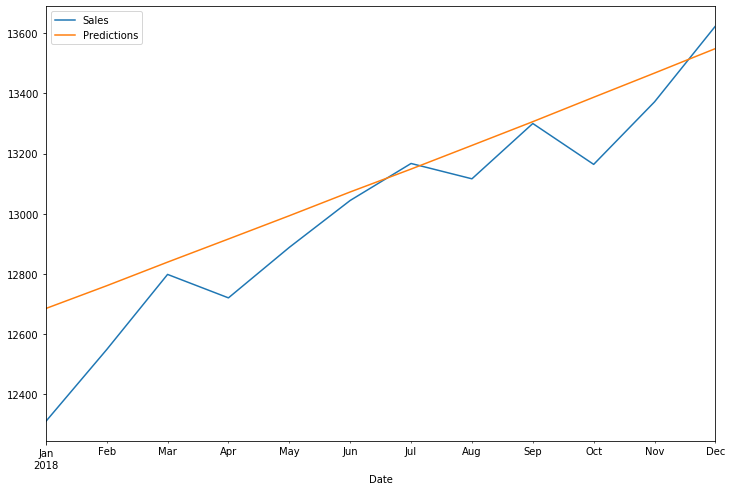

In [99]:
test.plot(figsize=(12,8))

In [100]:
## Saving the model:

model.save('RNNtimeSeriesmodel.h5')

In [101]:
pwd

'C:\\Users\\shaleens\\Time Series Cont'

In [102]:
from keras.models import load_model

In [103]:
my_model = load_model('RNNtimeSeriesmodel.h5')

In [104]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
